<h4><font color='#F55905'> <u>BUSINESS PROBLEM:</u></font><center><br><br><font color='#15657F'>REDUCE THE CAMPAIGN COST FOR THE PRODUCT(PERSONAL LOAN) OF IDBI BANK</font></center></h4>

This case is about a bank (IDBI Bank) which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). 

   ***A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success.  This has encouraged the retail marketing department to devise campaigns to better target marketing to increase the success ratio with a minimal budget.***
   
The department wants to build a model that will help them identify the potential customers who have a higher probability of purchasing the loan. 
This will increase the success ratio while at the same time reduce the cost of the campaign.

The file given below contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). 
Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign

<h4><font color='#F55905'><u>MACHINE LEARNING PROBLEM:</u></font><center><br><br><font color='#15657F'>USE A CLASSIFICATION MODEL TO PREDICT THE LIKELYHOOD OF A LIABILITY CUSTOMER BUYING PERSONAL LOANS</font></center></h4>

<h4><font color='#F55905'><u>ATTRIBUTE DESCRIPTION:</u></font></h4>

<table cellspacing="0" border="0">
	<tr>
		<td height="17" align="left">ID</td>
		<td align="left">Customer ID</td>
	</tr>
	<tr>
		<td height="17" align="left">Age</td>
		<td align="left">Customer's age in completed years</td>
	</tr>
	<tr>
		<td height="17" align="left">Experience</td>
		<td align="left">#years of professional experience</td>
	</tr>
	<tr>
		<td height="17" align="left">Income</td>
		<td align="left">Annual income of the customer</td>
	</tr>
	<tr>
		<td height="17" align="left">ZIPCode</td>
		<td align="left">Home Address ZIP code.</td>
	</tr>
	<tr>
		<td height="17" align="left">Family</td>
		<td align="left">Family size of the customer</td>
	</tr>
	<tr>
		<td height="17" align="left">CCAvg Avg.</td>
		<td align="left">spending on credit cards per month</td>
	</tr>
	<tr>
		<td height="17" align="left">Education</td>
		<td align="left">Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional</td>
	</tr>
	<tr>
		<td height="17" align="left">Mortgage</td>
		<td align="left">Value of house mortgage if any</td>
	</tr>
	<tr>
		<td height="17" align="left">Personal Loan</td>
		<td align="left">Did this customer accept the personal loan offered in the last campaign?</td>
	</tr>
	<tr>
		<td height="17" align="left">Securities Account</td>
		<td align="left">Does the customer have a securities account with the bank?</td>
	</tr>
	<tr>
		<td height="17" align="left">CD Account</td>
		<td align="left">Does the customer have a certificate of deposit (CD) account with the bank?</td>
	</tr>
	<tr>
		<td height="17" align="left">Online</td>
		<td align="left">Does the customer use internet banking facilities?</td>
	</tr>
	<tr>
		<td height="17" align="left">CreditCard</td>
		<td align="left">Does the customer uses a credit card issued by UniversalBank?</td>
	</tr>
</table>

<h4><font color='#F55905'><u> EVALUATION METRIC:</u></font></h4> <br>Recall for the positive class (Correctly classify people who opt for personal loan)

In [5]:
import os

from sklearn.metrics import classification_report


def classifcation_report_train_test(y_train, y_train_pred, y_test, y_test_pred):

    print('''
            =========================================
               CLASSIFICATION REPORT FOR TRAIN DATA
            =========================================
            ''')
    print(classification_report(y_train, y_train_pred))

    print('''
            =========================================
               CLASSIFICATION REPORT FOR TEST DATA
            =========================================
            ''')
    print(classification_report(y_test, y_test_pred))

In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

## Few important parameters of read_csv

### skiprows = Line numbers to skip  or we can specify the set of row names to exclude 
#####                    way 1: pd.read_csv('Bank.csv',skiprows=4)
#####                   way 2: pd.read_csv('Bank.csv',skiprows=[0,1,2,3,6])


### skipfooter = number of lines to skip from the bottom
#####  pd.read_csv('Bank.csv',skiprows=[0,1,2,3,6],skipfooter=0)


### nrows = no of rows to read from a file. useful for big datasets

### na_values = additional strings to recognise as NA/NAN values
#### pd.read_csv('Bank.csv',skiprows=[0,1,2,3],na_values={'Age':['Null']},nrows=10) its for feature specific
#### pd.read_csv('Bank.csv',skiprows=[0,1,2,3],na_values=['Null'],nrows=10)


### index_col = used to set the column as a row label
#### pd.read_csv('Bank.csv',skiprows=[0,1,2,3],na_values=['Null'],nrows=10,index_col='ID')

### usecols = used to subset the set of columns to read 
#### pd.read_csv('Bank.csv',skiprows=[0,1,2,3],na_values=['Null'],nrows=10,usecols=['Age','Income'])

In [7]:
# Load the Bank.csv
data=pd.read_csv("Bank.csv",skiprows=4,skipfooter=3,na_values=['Null'])


In [8]:
# Check the head and tail of data
data.head(6)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,NaN,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,NaN,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39.0,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35.0,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35.0,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37.0,13,29,92121,4,0.4,2,155,0,0,0,1,0


In [9]:
data.tail(6)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4994,4995,64.0,40,75,94588,3,2.0,3,0,0,0,0,1,0
4995,4996,29.0,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30.0,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63.0,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65.0,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28.0,4,83,92612,3,0.8,1,0,0,0,0,1,1


The variable ID,ZIP Code does not add any interesting information. There is no association between a person's customer ID ,ZIP Code and loan.So We Can Drop ID ,ZipCode

In [10]:
data=data.drop(columns=['ID','ZIP Code'],axis=1)
data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,NaN,1,49,4,1.6,1,0,0,1,0,0,0
1,NaN,19,34,3,1.5,1,0,0,1,0,0,0
2,39.0,15,11,1,1.0,1,0,0,0,0,0,0
3,35.0,9,100,1,2.7,2,0,0,0,0,0,0
4,35.0,8,45,4,1.0,2,0,0,0,0,0,1


In [11]:
#converting the column names to Lower case
data.columns = map(str.lower, data.columns)
data.columns

Index(['age', 'experience', 'income', 'family', 'ccavg', 'education',
       'mortgage', 'personal loan', 'securities account', 'cd account',
       'online', 'creditcard'],
      dtype='object')

In [12]:
#replace spaces in column names with _
data.columns = [x.replace(' ', '_') for x in data.columns]
data.columns

Index(['age', 'experience', 'income', 'family', 'ccavg', 'education',
       'mortgage', 'personal_loan', 'securities_account', 'cd_account',
       'online', 'creditcard'],
      dtype='object')

In [13]:
data.head()

,age,experience,income,family,ccavg,education,mortgage,personal_loan,securities_account,cd_account,online,creditcard
0,NaN,1,49,4,1.6,1,0,0,1,0,0,0
1,NaN,19,34,3,1.5,1,0,0,1,0,0,0
2,39.0,15,11,1,1.0,1,0,0,0,0,0,0
3,35.0,9,100,1,2.7,2,0,0,0,0,0,0
4,35.0,8,45,4,1.0,2,0,0,0,0,0,1


In [14]:
#check for null values
data.apply(lambda x : sum(x.isnull()))

age                   2
experience            0
income                0
family                0
ccavg                 0
education             0
mortgage              0
personal_loan         0
securities_account    0
cd_account            0
online                0
creditcard            0
dtype: int64

In [15]:
#find unique levels in each column\
data.apply(lambda x: len(x.unique()))

age                    46
experience             47
income                162
family                  4
ccavg                 108
education               3
mortgage              347
personal_loan           2
securities_account      2
cd_account              2
online                  2
creditcard              2
dtype: int64

# Another way to find unique levels in each column

In [16]:

def myfunc(x):
    return len(x.unique())

data.apply(myfunc)

age                    46
experience             47
income                162
family                  4
ccavg                 108
education               3
mortgage              347
personal_loan           2
securities_account      2
cd_account              2
online                  2
creditcard              2
dtype: int64

In [17]:
data.apply(lambda x: len(x.unique())).sort_values()

personal_loan           2
securities_account      2
cd_account              2
online                  2
creditcard              2
education               3
family                  4
age                    46
experience             47
ccavg                 108
income                162
mortgage              347
dtype: int64

In [18]:
# check the statistics of Dataframe
data.describe()

,age,experience,income,family,ccavg,education,mortgage,personal_loan,securities_account,cd_account,online,creditcard
count,4998.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.342537,20.104600,73.774200,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.461847,11.467954,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


# For Better Understanding Transpose The Above Matrix (by using T) 

In [19]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4998.0,45.342537,11.461847,23.0,35.0,45.0,55.0,67.0
experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
ccavg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
personal_loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
securities_account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
cd_account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


In [20]:
#Check is there any customers with negative experience, if yes remove those rows from data 
#data[data['experience']<0].count()
print('People Having Negative Experience:',data[data['experience'] < 0]['experience'].count())
print('People Having Positive Experience:',data[data['experience'] > 0]['experience'].count())

People Having Negative Experience: 52
People Having Positive Experience: 4882


In [21]:
#Check is there any customers with negative experience, if yes remove those rows from data 
data.drop(data[data['experience']<0].index,inplace=True)

In [22]:
data.experience.value_counts()

32    154
20    148
9     147
5     146
23    144
35    143
25    142
28    138
18    137
19    135
26    134
24    131
3     129
16    127
14    127
30    126
27    125
34    125
17    125
29    124
22    124
7     121
15    119
6     119
8     119
10    118
33    117
13    117
37    116
11    116
36    114
21    113
4     113
31    104
12    102
38     88
39     85
2      85
1      74
0      66
40     57
41     43
42      8
43      3
Name: experience, dtype: int64

there are 52 records with negative experience.so we don't want negative experience better remove those from  data

In [23]:
df = data.copy()
df.head()

,age,experience,income,family,ccavg,education,mortgage,personal_loan,securities_account,cd_account,online,creditcard
0,NaN,1,49,4,1.6,1,0,0,1,0,0,0
1,NaN,19,34,3,1.5,1,0,0,1,0,0,0
2,39.0,15,11,1,1.0,1,0,0,0,0,0,0
3,35.0,9,100,1,2.7,2,0,0,0,0,0,0
4,35.0,8,45,4,1.0,2,0,0,0,0,0,1


In [24]:
for col in df.columns:
    if len(df[col].unique()) < 10:
        print(col, df[col].unique())

family [4 3 1 2]
education [1 2 3]
personal_loan [0 1]
securities_account [1 0]
cd_account [0 1]
online [0 1]
creditcard [0 1]


In [25]:
# Check the no of levels of all categorical columns

num_col=['age','experience','income',"ccavg",'mortgage']
cat_col=df.columns.difference(num_col)
cat_col

Index(['cd_account', 'creditcard', 'education', 'family', 'online',
       'personal_loan', 'securities_account'],
      dtype='object')

In [26]:
df[cat_col] = df[cat_col].apply(lambda x: x.astype('category'))
df[num_col] = df[num_col].apply(lambda x: x.astype('float'))
df.dtypes

age                    float64
experience             float64
income                 float64
family                category
ccavg                  float64
education             category
mortgage               float64
personal_loan         category
securities_account    category
cd_account            category
online                category
creditcard            category
dtype: object

In [27]:
df[cat_col]

,cd_account,creditcard,education,family,online,personal_loan,securities_account
0,0,0,1,4,0,0,1
1,0,0,1,3,0,0,1
2,0,0,1,1,0,0,0
3,0,0,2,1,0,0,0
4,0,1,2,4,0,0,0
...,...,...,...,...,...,...,...
4995,0,0,3,1,1,0,0
4996,0,0,1,4,1,0,0
4997,0,0,3,2,0,0,0
4998,0,0,2,3,1,0,0


In [28]:
for i in df[cat_col]:
    #print([i],':',df[cat_col[i]].unique())
    print(i,':',df[i].nunique())
    


cd_account : 2
creditcard : 2
education : 3
family : 4
online : 2
personal_loan : 2
securities_account : 2


In [29]:
num_data = data.loc[:,num_col]
cat_data = data.loc[:,cat_col]
num_data.head()

,age,experience,income,ccavg,mortgage
0,NaN,1,49,1.6,0
1,NaN,19,34,1.5,0
2,39.0,15,11,1.0,0
3,35.0,9,100,2.7,0
4,35.0,8,45,1.0,0


## Imputations

In [30]:
# check is there any NA values present, and if present impute them 
cat_data.isna().sum()

cd_account            0
creditcard            0
education             0
family                0
online                0
personal_loan         0
securities_account    0
dtype: int64

In [31]:
num_data.isna().sum()

age           2
experience    0
income        0
ccavg         0
mortgage      0
dtype: int64

In [32]:
#num_data.fillna()
num_data.fillna(num_data['age'].mean(), inplace = True) 

In [33]:
num_data.isna().sum()

age           0
experience    0
income        0
ccavg         0
mortgage      0
dtype: int64

In [34]:
full_data = pd.concat([num_data,cat_data],axis=1)
full_data.head()

,age,experience,income,ccavg,mortgage,cd_account,creditcard,education,family,online,personal_loan,securities_account
0,45.561464,1,49,1.6,0,0,0,1,4,0,0,1
1,45.561464,19,34,1.5,0,0,0,1,3,0,0,1
2,39.000000,15,11,1.0,0,0,0,1,1,0,0,0
3,35.000000,9,100,2.7,0,0,0,2,1,0,0,0
4,35.000000,8,45,1.0,0,0,1,2,4,0,0,0


## Visualisations

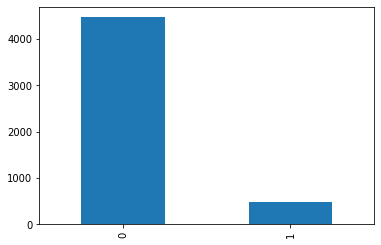

In [35]:
# check the Personal loan statistics with plot which is suited
full_data['personal_loan'].value_counts().plot(kind='bar')

Vectors of data represented as lists, numpy arrays, or pandas Series objects passed directly to the x, y, and/or hue parameters.
The x, y, and hue variables will determine how the data are plotted

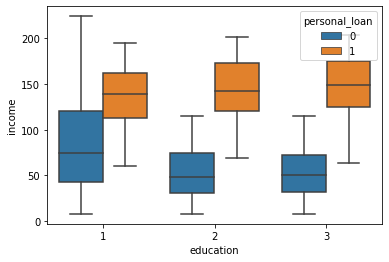

In [36]:
# Influence of income and education on personal loan and give the observations from the plot
sns.boxplot(x='education',y='income',hue='personal_loan',data=full_data)

Observation : It seems the customers whose education level is 1 is having more income. However customers who has taken the personal loan have the same income levels

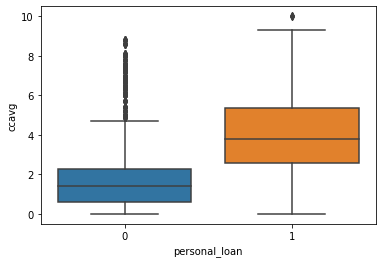

In [37]:
# Influence of Credict card usage and Personal Loan  and give observations from the plot
sns.boxplot(y='ccavg',x='personal_loan',data=full_data)

Observation : personal_loan =1, having more 'ccavg' than personal_loan=0
     .the outliers are more in personal_loan=0 than 1

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

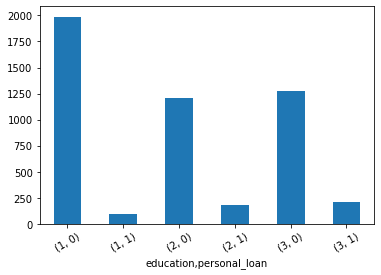

In [38]:
# Influence of education level on persoanl loan and give the insights
full_data.groupby(['education','personal_loan']).size().plot(kind='bar')
plt.xticks(rotation=30)                                                      

palette : Colors to use for the different levels of the hue variable. Should be something that can be interpreted by color_palette().

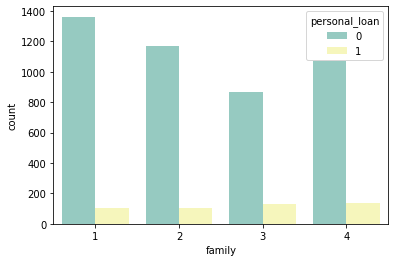

In [39]:
# Influence of family size on persoanl loan and suggest the insights
sns.countplot(x='family',data=full_data,hue='personal_loan',palette='Set3')

Observation : Family size does not have any impact in personal loan. But it seems families with size of 3 are more likely to take loan. When considering future campaign this might be good association.

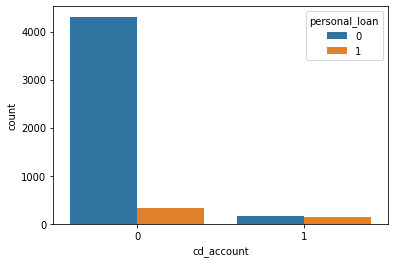

In [40]:
# Influence of deposit account on personal loan and give the insights
sns.countplot(x='cd_account',data=full_data,hue='personal_loan')

Observation : Customers who does not have cd_account , does not have loan as well. This seems to be majority. But almost all customers who has cd_account has loan as well

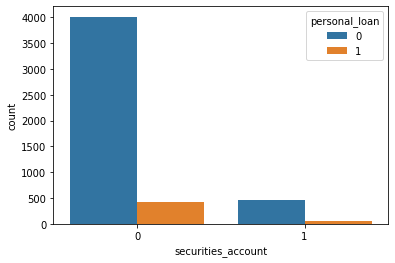

In [41]:
# Influence of Security account on personal loan and give the insights
sns.countplot(x="securities_account", data=full_data,hue="personal_loan")

Observation : Majority of customers who does not have loan have securities account

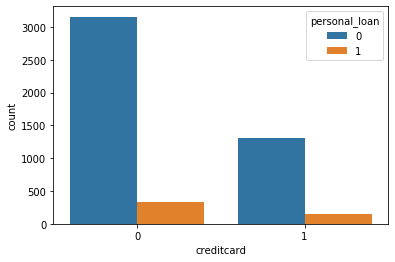

In [42]:
# Influence of Credit card on Persoanl Loan and give insights
sns.countplot(x="creditcard", data=full_data,hue="personal_loan")

Observation: The graph show persons who have personal loan have a higher credit card average.

In [43]:
#median
print('Non-Loan customers: ',full_data[full_data.personal_loan == 0]['ccavg'].median()*1000)
print('Loan customers    : ', full_data[full_data.personal_loan == 1]['ccavg'].median()*1000)

Non-Loan customers:  1400.0
Loan customers    :  3800.0


In [44]:
#mean
print('Non-Loan customers: ',full_data[full_data.personal_loan == 0]['ccavg'].mean()*1000)
print('Loan customers    : ', full_data[full_data.personal_loan == 1]['ccavg'].mean()*1000)

Non-Loan customers:  1724.3487018800427
Loan customers    :  3905.354166666666


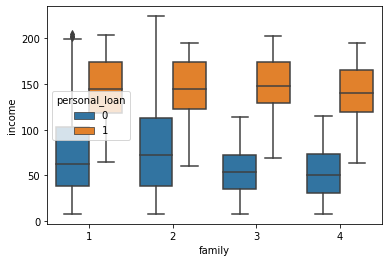

In [45]:
#family income personalloan realtionship
sns.boxplot(x='family',y='income',data=full_data,hue='personal_loan')

Observation : families with income less than 100K are less likely to take loan,than families with high income

In [46]:
# Correlation with heat map
import matplotlib.pyplot as plt
import seaborn as sns
corr = data.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})

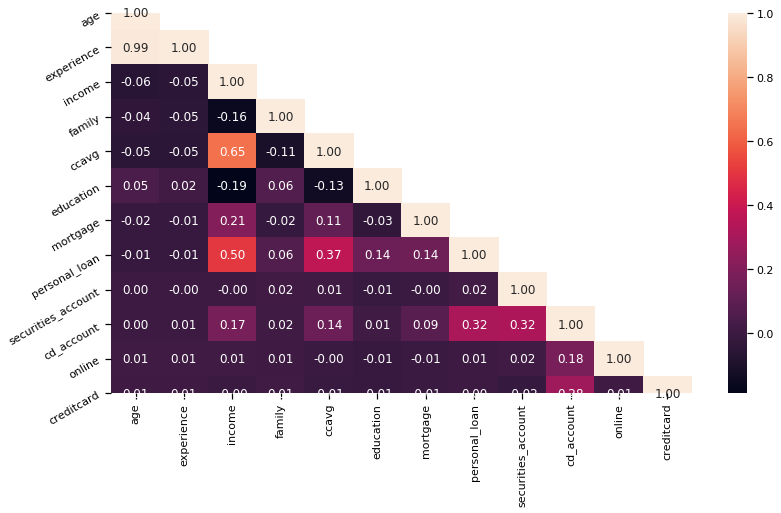

In [47]:
# Correlation with heat map
import matplotlib.pyplot as plt
import seaborn as sns
corr = data.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

Observed : 
Income and CCAvg is moderately correlated.
Age and Experience is highly correlated

In [48]:
#mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True

In [49]:
# creating` dummies for columns which have more than two levels
for col in cat_data.columns:
    if len(cat_data[col].unique()) > 2:
        print(col, cat_data[col].unique())

education [1 2 3]
family [4 3 1 2]


In [51]:
df = pd.get_dummies(data=full_data, columns=['family', 'education'], drop_first=True)
df.head()

,age,experience,income,ccavg,mortgage,cd_account,creditcard,online,personal_loan,securities_account,family_2,family_3,family_4,education_2,education_3
0,45.561464,1,49,1.6,0,0,0,0,0,1,0,0,1,0,0
1,45.561464,19,34,1.5,0,0,0,0,0,1,0,1,0,0,0
2,39.000000,15,11,1.0,0,0,0,0,0,0,0,0,0,0,0
3,35.000000,9,100,2.7,0,0,0,0,0,0,0,0,0,1,0
4,35.000000,8,45,1.0,0,0,1,0,0,0,0,0,1,1,0


In [52]:
# Train test split
## Split the data into X_train, X_test, y_train, y_test with test_size = 0.20 using sklearn
X = df.copy().drop("personal_loan",axis=1)
y = df["personal_loan"]

## Split the data into X_train, X_test, y_train, y_test with test_size = 0.20 using sklearn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## Print the shape of X_train, X_test, y_train, y_test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3958, 14)
(990, 14)
(3958,)
(990,)


In [48]:
X_train.head()

,age,experience,income,ccavg,mortgage,cd_account,creditcard,online,securities_account,family_2,family_3,family_4,education_2,education_3
2111,60.0,34,40,1.6,0,0,0,1,0,0,0,0,0,0
837,30.0,4,24,0.4,81,0,0,1,0,0,0,0,1,0
1399,40.0,16,69,2.4,0,0,0,1,0,0,0,1,0,0
2393,53.0,28,14,0.8,0,0,1,1,0,0,0,1,0,0
162,38.0,12,52,2.0,0,0,0,0,0,0,0,0,0,0


In [49]:
X_train.isna().sum()

age                   0
experience            0
income                0
ccavg                 0
mortgage              0
cd_account            0
creditcard            0
online                0
securities_account    0
family_2              0
family_3              0
family_4              0
education_2           0
education_3           0
dtype: int64

In [50]:
# after split check the proportion of target levels - train
print(y_train.value_counts(normalize=True)) 

0    0.902981
1    0.097019
Name: personal_loan, dtype: float64


In [51]:
# after split check the proportion of target levels - test
print(y_test.value_counts(normalize=True))

0    0.90303
1    0.09697
Name: personal_loan, dtype: float64


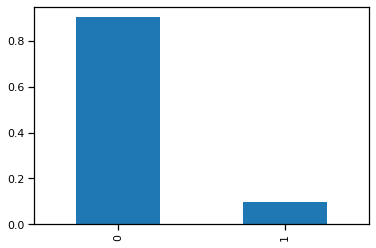

In [52]:
#you can also plot this 

import matplotlib.pyplot as plt
y_test.value_counts(normalize=True).plot(kind='bar')

In [53]:
# Implement ***SVM CLASSIFIER*** with grid search 

In [54]:
# Predict

In [55]:
# Apply the follwing models and show a data frame with the all the model performances
#    1. Logistic Regression - We haven't given the code, you need to explore!
#    2. Decision trees
#    3. K-nn 
    
# Please ensure you experiment with multiple hyper parameters for the each of the above algorithms


In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [57]:
lrc = LogisticRegression()

lrc.fit(X_train,y_train)

y_train_pred_lrc_be = lrc.predict(X_train)
y_test_pred_lrc_be = lrc.predict(X_test)

In [58]:
svc = SVC()

svc.fit(X_train,y_train)

y_train_pred_svc_be = svc.predict(X_train)
y_test_pred_svc_be = svc.predict(X_test)

In [59]:
dtc = DecisionTreeClassifier()

dtc.fit(X_train,y_train)

y_train_pred_dt_be = dtc.predict(X_train)
y_test_pred_dt_be = dtc.predict(X_test)

In [60]:
knn = KNeighborsClassifier()

knn.fit(X_train,y_train)

y_train_pred_knn_be = dtc.predict(X_train)
y_test_pred_knn_be = dtc.predict(X_test)
#classifcation_report_train_test(y_train,y_train_pred_knn_be,y_test, y_test_pred_knn_be)

In [61]:
naive_model = GaussianNB()
naive_model.fit(X_train, y_train)

y_train_pred_nv_be = naive_model.predict(X_train)
y_test_pred_nv_be =naive_model.predict(X_test)

In [62]:
from sklearn.metrics import recall_score

print("Recall of DecisionTrees:",recall_score(y_test, y_test_pred_dt_be))
print("Recall of LogisticRegression:",recall_score(y_test, y_test_pred_lrc_be))
print("Recall of SupportVectorMachines:",recall_score(y_test, y_test_pred_svc_be))
print("Recall of KNearestNeighbours:",recall_score(y_test, y_test_pred_knn_be))
print("Recall of naiibeys:",recall_score(y_test, y_test_pred_nv_be))

Recall of DecisionTrees: 0.8645833333333334
Recall of LogisticRegression: 0.6458333333333334
Recall of SupportVectorMachines: 0.041666666666666664
Recall of KNearestNeighbours: 0.8645833333333334
Recall of naiibeys: 0.5625


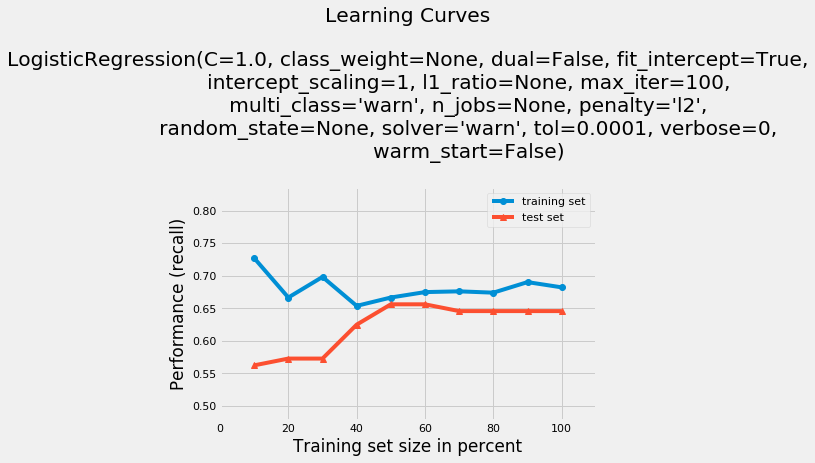

In [63]:
from mlxtend.plotting import plot_learning_curves
plot_learning_curves(X_train, y_train, X_test, y_test, lrc,scoring='recall')
plt.show()

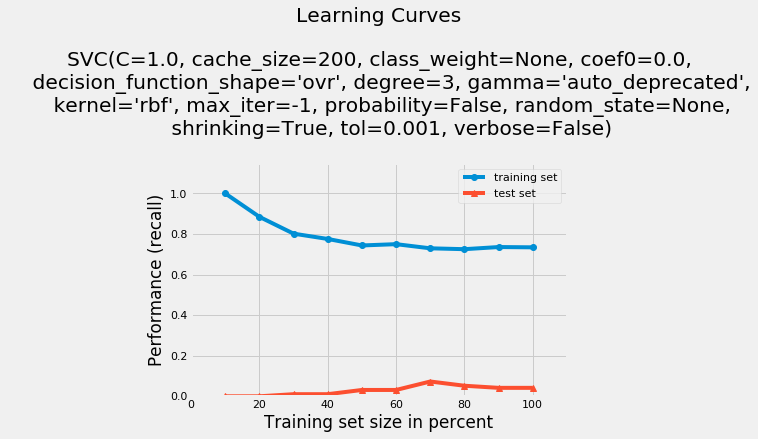

In [64]:
from mlxtend.plotting import plot_learning_curves
plot_learning_curves(X_train, y_train, X_test, y_test, svc,scoring='recall')
plt.show()

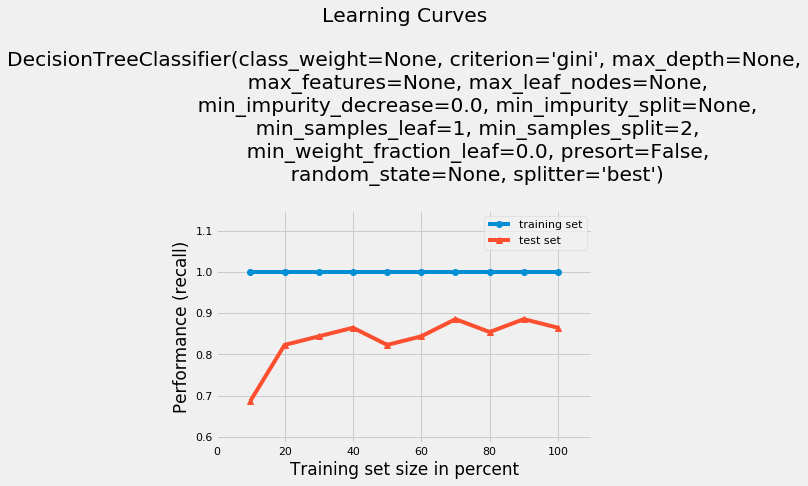

In [65]:
from mlxtend.plotting import plot_learning_curves
plot_learning_curves(X_train, y_train, X_test, y_test, dtc,scoring='recall')
plt.show()

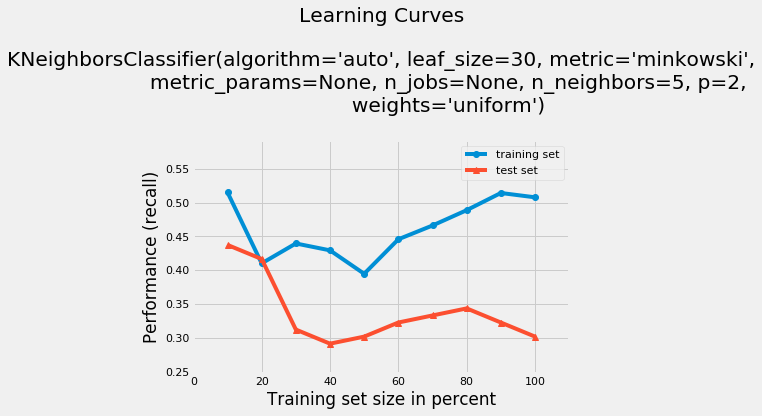

In [66]:
from mlxtend.plotting import plot_learning_curves
plot_learning_curves(X_train, y_train, X_test, y_test, knn,scoring='recall')
plt.show()

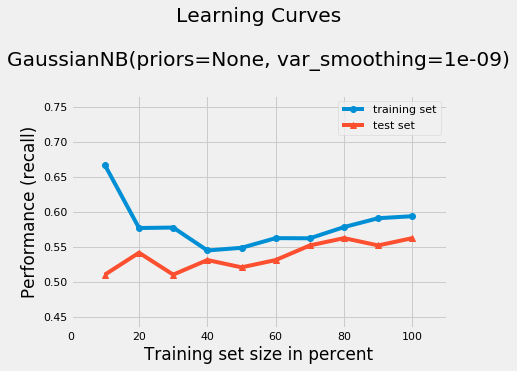

In [67]:
from mlxtend.plotting import plot_learning_curves
plot_learning_curves(X_train, y_train, X_test, y_test, naive_model,scoring='recall')
plt.show()

# Standardization

In [68]:
#Scale the numeric attributes

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train[num_col])

X_train[num_col] = scaler.transform(X_train[num_col])
X_test[num_col] = scaler.transform(X_test[num_col])
X_train.head()

,age,experience,income,ccavg,mortgage,cd_account,creditcard,online,securities_account,family_2,family_3,family_4,education_2,education_3
2111,0.837209,0.790698,0.148148,0.16,0.000000,0,0,1,0,0,0,0,0,0
837,0.139535,0.093023,0.074074,0.04,0.127559,0,0,1,0,0,0,0,1,0
1399,0.372093,0.372093,0.282407,0.24,0.000000,0,0,1,0,0,0,1,0,0
2393,0.674419,0.651163,0.027778,0.08,0.000000,0,1,1,0,0,0,1,0,0
162,0.325581,0.279070,0.203704,0.20,0.000000,0,0,0,0,0,0,0,0,0


In [69]:
#Build svc Classifier
from sklearn.svm import SVC

In [70]:
## Create an SVC object and print it to see the default arguments

svc = SVC(class_weight='balanced')
svc

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [71]:
svc.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [72]:
y_train_pred_svc = svc.predict(X_train)
y_test_pred_svc = svc.predict(X_test)

In [73]:
#from sklearn.metrics import classifcation_report_train_test
classifcation_report_train_test(y_train, y_train_pred_svc, y_test, y_test_pred_svc)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      3574
           1       0.66      0.94      0.77       384

    accuracy                           0.95      3958
   macro avg       0.82      0.94      0.87      3958
weighted avg       0.96      0.95      0.95      3958


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       894
           1       0.66      0.93      0.77        96

    accuracy                           0.95       990
   macro avg       0.83      0.94      0.87       990
weighted avg       0.96      0.95      0.95       990



In [74]:
!pip install mlxtend

# trial 1 Hyperpameter tuning

In [75]:
## Use Grid Search for parameter tuning

from sklearn.model_selection import GridSearchCV

svc_grid = SVC(class_weight='balanced')
 

param_grid = {

'C': [0.001, 0.01, 0.1, 1, 10],
'gamma': [0.001, 0.01, 0.1, 1], 
'kernel':['linear', 'rbf']}

 
svc_cv_grid = GridSearchCV(estimator = svc_grid, param_grid = param_grid, cv = 10)

In [76]:
svc_cv_grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight='balanced',
                           coef0=0.0, decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [77]:
# Display the best estimator
svc_cv_grid.best_estimator_

SVC(C=10, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [78]:
#predicting using best_estimator
y_train_pred_svc_best = svc_cv_grid.best_estimator_.predict(X_train)
y_test_pred_svc_best = svc_cv_grid.best_estimator_.predict(X_test)

In [79]:
#classification reprot by using base function created on first cell
classifcation_report_train_test(y_train, y_train_pred_svc_best, y_test, y_test_pred_svc_best)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3574
           1       0.91      0.99      0.95       384

    accuracy                           0.99      3958
   macro avg       0.96      0.99      0.97      3958
weighted avg       0.99      0.99      0.99      3958


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       894
           1       0.80      0.89      0.84        96

    accuracy                           0.97       990
   macro avg       0.89      0.93      0.91       990
weighted avg       0.97      0.97      0.97       990



# trial 2 Hyperparameter tuning

In [80]:
## Use Grid Search for parameter tuning

from sklearn.model_selection import GridSearchCV

svc_grid = SVC(class_weight='balanced')
 

param_grid = {

'C': [0.6,0.7,0.8,0.9,1,1.5],
'gamma': [1,2,3,4,5], 
'kernel':['linear', 'rbf']}

 
svc_cv_grid2 = GridSearchCV(estimator = svc_grid, param_grid = param_grid, cv = 10)

In [81]:
svc_cv_grid2.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight='balanced',
                           coef0=0.0, decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.6, 0.7, 0.8, 0.9, 1, 1.5],
                         'gamma': [1, 2, 3, 4, 5],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [82]:
svc_cv_grid2.best_estimator_

SVC(C=1.5, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [83]:
y_train_pred_svc_best2 = svc_cv_grid2.best_estimator_.predict(X_train)
y_test_pred_svc_best2 = svc_cv_grid2.best_estimator_.predict(X_test)

In [86]:
classifcation_report_train_test(y_train, y_train_pred_svc_best2, y_test, y_test_pred_svc_best2)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3574
           1       0.84      0.98      0.90       384

    accuracy                           0.98      3958
   macro avg       0.92      0.98      0.95      3958
weighted avg       0.98      0.98      0.98      3958


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       894
           1       0.79      0.90      0.84        96

    accuracy                           0.97       990
   macro avg       0.89      0.94      0.91       990
weighted avg       0.97      0.97      0.97       990




# Trial 3

In [87]:
## Use Grid Search for parameter tuning

from sklearn.model_selection import GridSearchCV

svc_grid = SVC(class_weight='balanced')
 

param_grid = {

'C': [0.6,0.7,0.8,0.9,1,1.5],
'gamma': [0.6,0.7,0.8],  
'kernel':['linear', 'rbf']}

 
svc_cv_grid3 = GridSearchCV(estimator = svc_grid, param_grid = param_grid, cv = 10)

In [88]:
svc_cv_grid3.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight='balanced',
                           coef0=0.0, decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.6, 0.7, 0.8, 0.9, 1, 1.5],
                         'gamma': [0.6, 0.7, 0.8],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [89]:
svc_cv_grid3.best_estimator_

SVC(C=0.9, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.6, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [90]:
y_train_pred_svc_best1 = svc_cv_grid3.best_estimator_.predict(X_train)
y_test_pred_svc_best1 = svc_cv_grid3.best_estimator_.predict(X_test)

In [91]:
classifcation_report_train_test(y_train, y_train_pred_svc_best1, y_test, y_test_pred_svc_best1)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      3574
           1       0.80      0.96      0.87       384

    accuracy                           0.97      3958
   macro avg       0.90      0.97      0.93      3958
weighted avg       0.98      0.97      0.97      3958


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       894
           1       0.79      0.91      0.84        96

    accuracy                           0.97       990
   macro avg       0.89      0.94      0.91       990
weighted avg       0.97      0.97      0.97       990



# Trial 4

In [92]:
## Use Grid Search for parameter tuning

from sklearn.model_selection import GridSearchCV

svc_grid = SVC(class_weight='balanced')
 

param_grid = {

'C': [0.9,1,1.2,1.3,1.4],
'gamma': [0.6,0.7,0.8], 
'kernel':['linear', 'rbf']}

 
svc_cv_grid4 = GridSearchCV(estimator = svc_grid, param_grid = param_grid, cv = 10)

In [93]:
svc_cv_grid4.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight='balanced',
                           coef0=0.0, decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.9, 1, 1.2, 1.3, 1.4], 'gamma': [0.6, 0.7, 0.8],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [94]:
svc_cv_grid4.best_estimator_

SVC(C=1.2, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.6, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [95]:
svc_cv_grid4.best_params_

{'C': 1.2, 'gamma': 0.6, 'kernel': 'rbf'}

In [96]:
y_train_pred_svc_best2 = svc_cv_grid4.best_estimator_.predict(X_train)
y_test_pred_svc_best2 = svc_cv_grid4.best_estimator_.predict(X_test)

In [97]:
classifcation_report_train_test(y_train, y_train_pred_svc_best2, y_test, y_test_pred_svc_best2)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3574
           1       0.82      0.97      0.88       384

    accuracy                           0.98      3958
   macro avg       0.91      0.97      0.94      3958
weighted avg       0.98      0.98      0.98      3958


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       894
           1       0.79      0.92      0.85        96

    accuracy                           0.97       990
   macro avg       0.89      0.94      0.91       990
weighted avg       0.97      0.97      0.97       990



# Learning Curves

([1.0,
  1.0,
  1.0,
  0.9807692307692307,
  0.9641025641025641,
  0.975,
  0.9679715302491103,
  0.9712460063897763,
  0.96875,
  0.9661458333333334],
 [0.6770833333333334,
  0.8125,
  0.84375,
  0.8645833333333334,
  0.875,
  0.8958333333333334,
  0.8958333333333334,
  0.9166666666666666,
  0.90625,
  0.9166666666666666])

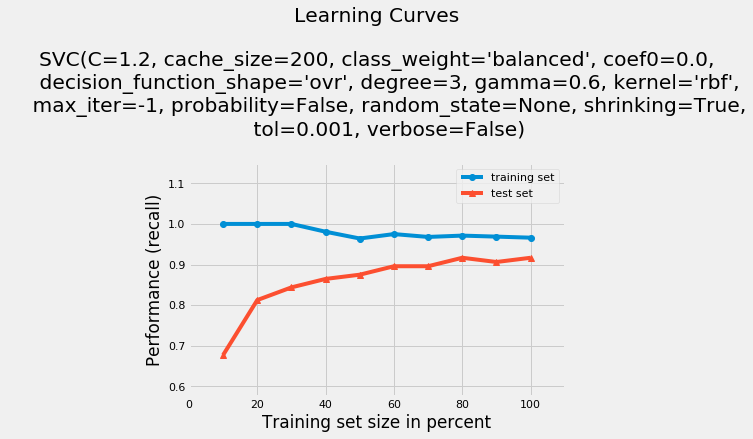

In [98]:
from mlxtend.plotting import plot_learning_curves
plot_learning_curves(X_train, y_train, X_test, y_test, svc_cv_grid4.best_estimator_,scoring='recall')


# KNN random tuning

In [191]:
knn1 = KNeighborsClassifier(n_neighbors= 3 , weights = 'uniform', metric='euclidean')
knn1.fit(X_train, y_train)    
predicted = knn1.predict(X_test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, predicted)
print(acc)

0.9636363636363636


In [192]:
knn1 = KNeighborsClassifier(n_neighbors= 5 , weights = 'uniform', metric='euclidean')
knn1.fit(X_train, y_train)    
predicted = knn1.predict(X_test)
from sklearn.metrics import accuracy_score
acc = recall_score(y_test, predicted)
print(acc)

0.5833333333333334


In [193]:
knn2 = KNeighborsClassifier(n_neighbors= 7, weights = 'uniform', metric='euclidean')
knn2.fit(X_train, y_train)    
predicted2 = knn2.predict(X_test)
from sklearn.metrics import accuracy_score
acc = recall_score(y_test, predicted2)
print(acc)

0.5104166666666666



# KNN tuning using GridSearchCV

In [102]:
grid_params ={
    'n_neighbors':[3,5,7,9],
    'weights':['uniform','distance'],
    'metric':['euclidean','manhattan','minkowski']
}
gs_results=GridSearchCV(KNeighborsClassifier(),grid_params,verbose=1,cv=5,n_jobs=-1)
gs_results.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 113 out of 120 | elapsed:    6.7s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    6.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [103]:
gs_results.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

In [104]:
gs_results.best_params_

{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}

In [105]:
gs_results.best_score_

0.9489641232945932

In [106]:
knn_predict_train=gs_results.best_estimator_.predict(X_train)
knn_predict_test=gs_results.best_estimator_.predict(X_test)

In [107]:
classifcation_report_train_test(y_train, knn_predict_train, y_test, knn_predict_test)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3574
           1       1.00      1.00      1.00       384

    accuracy                           1.00      3958
   macro avg       1.00      1.00      1.00      3958
weighted avg       1.00      1.00      1.00      3958


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       894
           1       0.96      0.71      0.81        96

    accuracy                           0.97       990
   macro avg       0.96      0.85      0.90       990
weighted avg       0.97      0.97      0.97       990



# Choosing a K Value

Let's go ahead and use the elbow method to pick a good K Value:

In [108]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

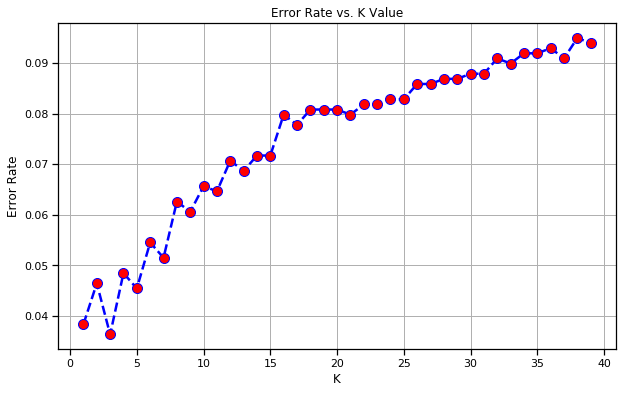

In [109]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()
plt.show()

Observation : at k=3 we are getting less error.....and we can also get k=1 less error but it is overfitting case.So,better to avoid k=1.

# Decision Tree Tuning using GridSearchCV()

In [110]:
from sklearn.tree import DecisionTreeClassifier

 make an array of depths to choose from, say 1 to 20

In [111]:
depths = np.arange(1, 21)
depths

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [112]:
#num_leafs = [1, 5, 10, 20, 50, 100]
#criterion = ['gini', 'entropy']

In [113]:
param_grid = { 'criterion':['gini','entropy'],'max_depth': depths}
dtree_model=DecisionTreeClassifier()

In [114]:
gs = GridSearchCV(estimator=dtree_model, param_grid=param_grid, cv=10)

In [115]:
gs = gs.fit(X_train, y_train)

In [116]:
gs.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [117]:
gs.best_params_

{'criterion': 'entropy', 'max_depth': 6}

In [118]:
dt_predict_train=gs.best_estimator_.predict(X_train)
dt_predict_test=gs.best_estimator_.predict(X_test)

In [119]:
classifcation_report_train_test(y_train, dt_predict_train, y_test, dt_predict_test)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3574
           1       1.00      0.90      0.95       384

    accuracy                           0.99      3958
   macro avg       0.99      0.95      0.97      3958
weighted avg       0.99      0.99      0.99      3958


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       894
           1       0.99      0.83      0.90        96

    accuracy                           0.98       990
   macro avg       0.99      0.92      0.95       990
weighted avg       0.98      0.98      0.98       990



We got max_depth=6 .So, use this max_depth value in DTClassifier 

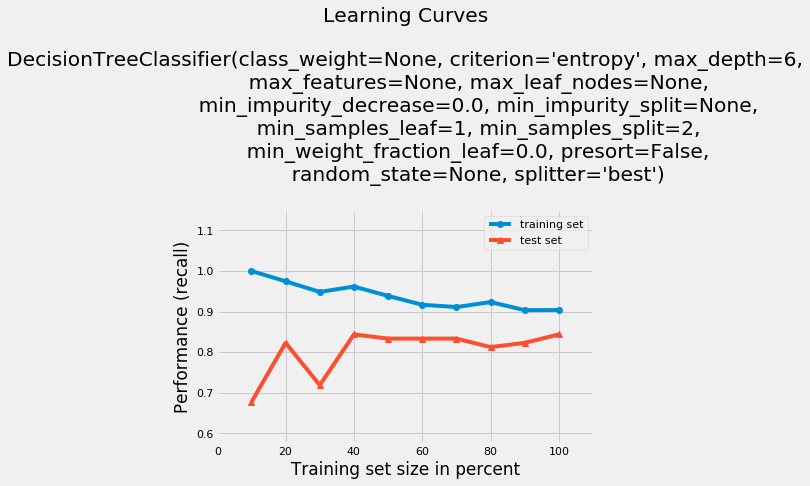

In [120]:
from mlxtend.plotting import plot_learning_curves
plot_learning_curves(X_train, y_train, X_test, y_test, gs.best_estimator_,scoring='recall')
plt.show()

In [122]:
from sklearn import tree
dt1=tree.DecisionTreeClassifier(max_depth=6)
dt1.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [123]:
dt1.get_depth

<bound method BaseDecisionTree.get_depth of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')>

In [124]:
dt1.get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')>

In [125]:
#dt1.predict(X_test)
dt1_predict_train=dt1.predict(X_train)
dt1_predict_test=dt1.predict(X_test)

In [126]:
classifcation_report_train_test(y_train, dt1_predict_train, y_test, dt1_predict_test)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3574
           1       0.99      0.92      0.96       384

    accuracy                           0.99      3958
   macro avg       0.99      0.96      0.98      3958
weighted avg       0.99      0.99      0.99      3958


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       894
           1       0.93      0.82      0.87        96

    accuracy                           0.98       990
   macro avg       0.96      0.91      0.93       990
weighted avg       0.98      0.98      0.98       990



[Text(167.91036585365853, 201.90857142857143, 'X[2] <= 0.475\ngini = 0.175\nsamples = 3958\nvalue = [3574, 384]'),
 Text(70.43048780487806, 170.84571428571428, 'X[3] <= 0.295\ngini = 0.032\nsamples = 3109\nvalue = [3058, 51]'),
 Text(16.33170731707317, 139.78285714285715, 'X[2] <= 0.456\ngini = 0.002\nsamples = 2891\nvalue = [2888, 3]'),
 Text(8.165853658536586, 108.72, 'gini = 0.0\nsamples = 2866\nvalue = [2866, 0]'),
 Text(24.49756097560976, 108.72, 'X[13] <= 0.5\ngini = 0.211\nsamples = 25\nvalue = [22, 3]'),
 Text(16.33170731707317, 77.65714285714284, 'gini = 0.0\nsamples = 17\nvalue = [17, 0]'),
 Text(32.66341463414634, 77.65714285714284, 'X[8] <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(24.49756097560976, 46.59428571428572, 'X[0] <= 0.128\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(16.33170731707317, 15.531428571428563, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(32.66341463414634, 15.531428571428563, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(

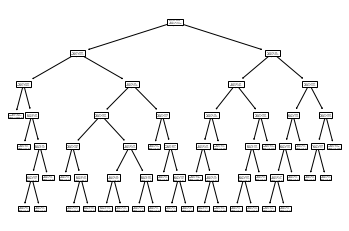

In [127]:
tree.plot_tree(dt1.fit(X_train, y_train)) 

In [128]:
!pip install pydotplus

In [132]:
dt1.feature_importances_

array([0.00569118, 0.00232844, 0.35897204, 0.05231624, 0.00457222,
       0.0211722 , 0.        , 0.00525879, 0.00323395, 0.        ,
       0.09244993, 0.07776192, 0.21636077, 0.15988232])

In [133]:
f_imp = pd.Series(dt1.feature_importances_, index = X_train.columns)

In [136]:
## Sort importances  
f_imp_order= f_imp.nlargest(n=10)
f_imp_order

income         0.358972
education_2    0.216361
education_3    0.159882
family_3       0.092450
family_4       0.077762
ccavg          0.052316
cd_account     0.021172
age            0.005691
online         0.005259
mortgage       0.004572
dtype: float64

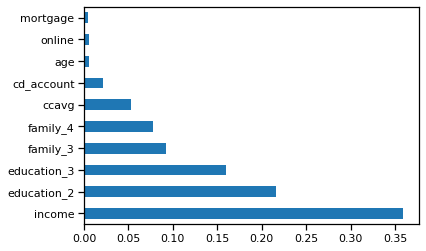

In [137]:
## Plot Importance
%matplotlib inline
f_imp_order.plot(kind='barh')
plt.show()

# Logistic Regression With GridSearchCV()

l1,l2 : Create regularization penalty space

C : Create regularization hyperparameter space

In [138]:
# Grid search cross validation
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 10.0, 'penalty': 'l2'}
accuracy : 0.961344113188479


In [139]:
logreg2=LogisticRegression(C=10,penalty="l2")
logreg2.fit(X_train,y_train)
print("score",logreg2.score(X_test,y_test))


score 0.9494949494949495


In [140]:
reg_predict_train=logreg2.predict(X_train)
reg_predict_test=logreg2.predict(X_test)
classifcation_report_train_test(y_train, reg_predict_train, y_test, reg_predict_test)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3574
           1       0.89      0.70      0.78       384

    accuracy                           0.96      3958
   macro avg       0.93      0.84      0.88      3958
weighted avg       0.96      0.96      0.96      3958


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       894
           1       0.84      0.59      0.70        96

    accuracy                           0.95       990
   macro avg       0.90      0.79      0.83       990
weighted avg       0.95      0.95      0.95       990



# Why Grid Search is not performed for Naive Bayes Classifier?

   there is no any hyperparameter to tune

# RF Classifier

In [141]:
# Create first pipeline for base without reducing features.

#pipe = Pipeline([('classifier' , RandomForestClassifier())])
# pipe = Pipeline([('classifier', RandomForestClassifier())])

# Create param grid.
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [240,245,250],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [12,13,14],
    'criterion' :['gini', 'entropy']
}
# Create grid search object
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'

In [143]:
CV_rfc.best_estimator_

#max_depth=13,max_features='auto',n_estimators=240,criterion='entropy'

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=13, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=240,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [144]:
rf_predict_train=CV_rfc.best_estimator_.predict(X_train)
rf_predict_test=CV_rfc.best_estimator_.predict(X_test)
classifcation_report_train_test(y_train, rf_predict_train, y_test, rf_predict_test)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3574
           1       1.00      1.00      1.00       384

    accuracy                           1.00      3958
   macro avg       1.00      1.00      1.00      3958
weighted avg       1.00      1.00      1.00      3958


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       894
           1       0.98      0.82      0.89        96

    accuracy                           0.98       990
   macro avg       0.98      0.91      0.94       990
weighted avg       0.98      0.98      0.98       990



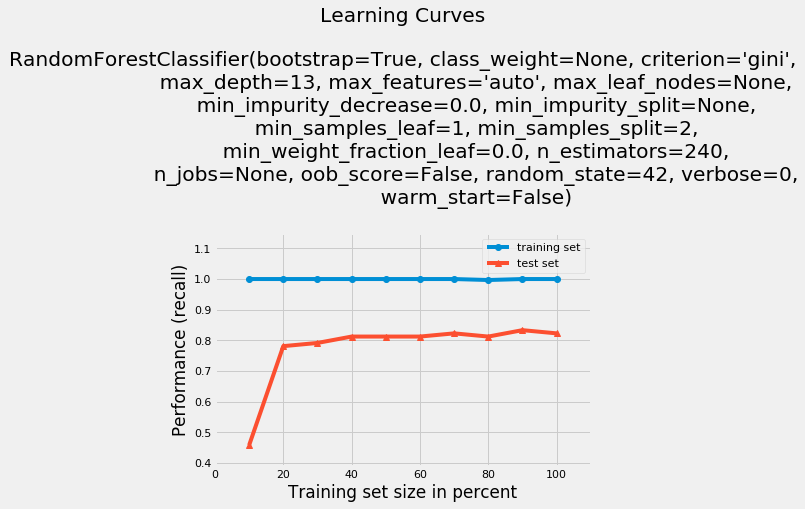

In [145]:
from mlxtend.plotting import plot_learning_curves
plot_learning_curves(X_train, y_train, X_test, y_test, CV_rfc.best_estimator_,scoring='recall')
plt.show()

In [146]:
CV_rfc.best_estimator_.feature_importances_

array([0.04219489, 0.04091235, 0.33260649, 0.16022406, 0.03829776,
       0.06351861, 0.01010878, 0.00797404, 0.00546108, 0.01339115,
       0.05349736, 0.05370131, 0.08697389, 0.09113822])

In [147]:
feat_importances = pd.Series(CV_rfc.best_estimator_.feature_importances_, index = X_train.columns)

In [148]:
feat_importances_ordered = feat_importances.nlargest(n=10)
feat_importances_ordered

income         0.332606
ccavg          0.160224
education_3    0.091138
education_2    0.086974
cd_account     0.063519
family_4       0.053701
family_3       0.053497
age            0.042195
experience     0.040912
mortgage       0.038298
dtype: float64

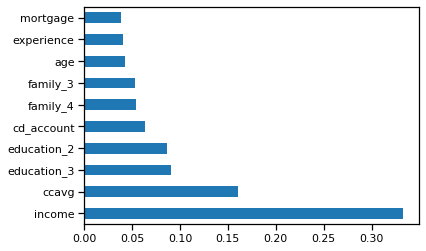

In [149]:
## Plot Importance
%matplotlib inline
feat_importances_ordered.plot(kind='barh')
plt.show()

In [186]:
from sklearn.metrics import recall_score

scores = pd.DataFrame(columns=['Model','Train_Recall','Test_Recall'])

def get_metrics(train_actual,train_predicted,test_actual,test_predicted,model_description,dataframe):
    
    train_recall   = recall_score(train_actual,train_predicted)
    test_recall   = recall_score(test_actual,test_predicted)
    dataframe = dataframe.append(pd.Series([model_description,train_recall,
                                            test_recall],
                                           index=scores.columns ), ignore_index=True)
    return(dataframe)

In [187]:
scores = get_metrics(y_train,y_train_pred_dt_be,y_test,y_test_pred_dt_be,'DecisionTrees basic model',scores)
scores = get_metrics(y_train,y_train_pred_lrc_be,y_test,y_test_pred_lrc_be,'LogisticRegression basic model',scores)
scores = get_metrics(y_train, y_train_pred_svc_be,y_test, y_test_pred_svc_be,'SupportVectorMachines basic model',scores)
scores = get_metrics(y_train, y_train_pred_knn_be,y_test, y_test_pred_knn_be,'KNearestNeighbours basic model',scores)
scores = get_metrics(y_train, y_train_pred_nv_be,y_test, y_test_pred_nv_be,'naiibeys basic model',scores)
scores = get_metrics(y_train,dt_predict_train,y_test,dt_predict_test,'Decision Tree with GridSearchCV()',scores)
scores = get_metrics(y_train,reg_predict_train,y_test,reg_predict_test,'logistic regression with GridSearchCV()',scores)
scores = get_metrics(y_train,y_train_pred_svc_best2,y_test,y_test_pred_svc_best2,'SVC using GridSearchCV()',scores)
scores = get_metrics(y_train,knn_predict_train,y_test,knn_predict_test,'KNN using GridSearchCV(),Where k=5',scores)
#scores1 = get_metrics(y_train,rf_predict_train,y_test,rf_predict_test,'random forest using GridSearchCV',scores1)



In [188]:
scores

,Model,Train_Recall,Test_Recall
0,DecisionTrees basic model,1.000000,0.864583
1,LogisticRegression basic model,0.682292,0.645833
2,SupportVectorMachines basic model,0.734375,0.041667
3,KNearestNeighbours basic model,1.000000,0.864583
4,naiibeys basic model,0.593750,0.562500
5,Decision Tree with GridSearchCV(),0.903646,0.833333
6,logistic regression with GridSearchCV(),0.697917,0.593750
7,SVC using GridSearchCV(),0.966146,0.916667
8,"KNN using GridSearchCV(),Where k=5",1.000000,0.708333


In [190]:
scores.insert(3, "Best Tuning Parametrs",['','','','','','{criterion: gini, max_depth: 6}', '{C: 10.0, penalty: l2}', '{C: 1, gamma: 0.7, kernel: rbf}', '{metric: euclidean, n_neighbors: 3, weights: distance}'], True)
scores

,Model,Train_Recall,Test_Recall,Best Tuning Parametrs,Best Tuning Parametrs
0,DecisionTrees basic model,1.000000,0.864583,,
1,LogisticRegression basic model,0.682292,0.645833,,
2,SupportVectorMachines basic model,0.734375,0.041667,,
3,KNearestNeighbours basic model,1.000000,0.864583,,
4,naiibeys basic model,0.593750,0.562500,,
5,Decision Tree with GridSearchCV(),0.903646,0.833333,"{criterion: gini, max_depth: 6}","{criterion: gini, max_depth: 6}"
6,logistic regression with GridSearchCV(),0.697917,0.593750,"{C: 10.0, penalty: l2}","{C: 10.0, penalty: l2}"
7,SVC using GridSearchCV(),0.966146,0.916667,"{C: 1, gamma: 0.7, kernel: rbf}","{C: 1, gamma: 0.7, kernel: rbf}"
8,"KNN using GridSearchCV(),Where k=5",1.000000,0.708333,"{metric: euclidean, n_neighbors: 3, weights: d...","{metric: euclidean, n_neighbors: 3, weights: d..."


# ENSEMBLE METHODS AND STACKING

In [53]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [58]:
y_train.value_counts()

0    3589
1     369
Name: personal_loan, dtype: int64

In [60]:
print('class 0:',3589/(3589+369))
print('class 1:',369/(3589+369))

class 0: 0.9067710965133906
class 1: 0.0932289034866094


In [57]:
#xgb_pred=xgb.predict(X_test)
xgb_predict_train=xgb.predict(X_train)
xgb_predict_test=xgb.predict(X_test)
classifcation_report_train_test(y_train, xgb_predict_train, y_test, xgb_predict_test)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3589
           1       1.00      1.00      1.00       369

    accuracy                           1.00      3958
   macro avg       1.00      1.00      1.00      3958
weighted avg       1.00      1.00      1.00      3958


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       879
           1       0.97      0.93      0.95       111

    accuracy                           0.99       990
   macro avg       0.98      0.96      0.97       990
weighted avg       0.99      0.99      0.99       990



# calculating scale_pos_weight value to handle class imbalnace

### scale_pos_weight  parameter same for both xgboost and lgbm

In [62]:
from collections import Counter
counter = Counter(y)
# estimate scale_pos_weight value
estimate = counter[0] / counter[1]
print('Estimate: %.3f' % estimate)

Estimate: 9.308


In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
model=XGBClassifier()
weights = [1,9, 10, 25, 50, 75, 99, 100, 1000]
param_grid = dict(scale_pos_weight=weights)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')
# execute the grid search
grid_result = grid.fit(X_train, y_train)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.997123 using {'scale_pos_weight': 9}
0.997009 (0.003136) with: {'scale_pos_weight': 1}
0.997123 (0.002590) with: {'scale_pos_weight': 9}
0.997012 (0.002565) with: {'scale_pos_weight': 10}
0.996729 (0.002990) with: {'scale_pos_weight': 25}
0.996259 (0.003945) with: {'scale_pos_weight': 50}
0.996321 (0.004744) with: {'scale_pos_weight': 75}
0.996537 (0.003380) with: {'scale_pos_weight': 99}
0.995811 (0.005297) with: {'scale_pos_weight': 100}
0.996095 (0.005074) with: {'scale_pos_weight': 1000}


In [70]:
xgb_weight = XGBClassifier()
param_grid = {  'scale_pos_weight':[9],
                'max_depth':[8,14,18],
                'n_estimators':[100,150,200,250],
              'learning_rate':[0.01,0.1,1,10],
              'subsample':[0.8]
                
                 
}
# Create grid search object
CV_xgb = GridSearchCV(estimator=xgb_weight, param_grid=param_grid, cv= 5)
CV_xgb.fit(X_train, y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constrai...
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=False,
                                     verbosity=None),
             iid='warn', n_jobs=None,
             para

In [71]:
CV_xgb.best_estimator_

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=9, subsample=0.8, tree_method=None,
              validate_parameters=False, verbosity=None)

In [72]:
xgb_weight_predict_train=CV_xgb.best_estimator_.predict(X_train)
xgb_weight_predict_test=CV_xgb.best_estimator_.predict(X_test)
classifcation_report_train_test(y_train, xgb_weight_predict_train, y_test, xgb_weight_predict_test)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3589
           1       1.00      1.00      1.00       369

    accuracy                           1.00      3958
   macro avg       1.00      1.00      1.00      3958
weighted avg       1.00      1.00      1.00      3958


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       879
           1       0.95      0.95      0.95       111

    accuracy                           0.99       990
   macro avg       0.97      0.97      0.97       990
weighted avg       0.99      0.99      0.99       990



roc_auc_score for xgb:  0.9989238385142821


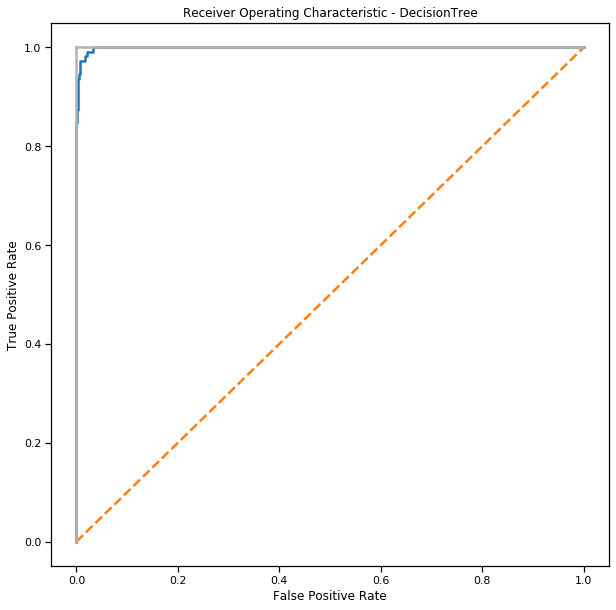

In [75]:
from sklearn.metrics import roc_curve, roc_auc_score
y_score1 = CV_xgb.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
print('roc_auc_score for xgb: ', roc_auc_score(y_test, y_score1))
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [80]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
parms = {  'scale_pos_weight':[9],
                'max_depth':[14,15,18,20,25],
                'n_estimators':[20,50,100,150],
              'learning_rate':[0.01,0.1,1,10],
              'subsample':[0.8,0.7]
                
                 
}
clf = lgb.LGBMClassifier()

CV_lgbm = GridSearchCV(estimator = clf,param_grid = parms,cv=3,refit=True,
                        return_train_score = True,verbose=10,n_jobs=-1)
CV_lgbm.fit(X_train,y_train)

Fitting 3 folds for each of 160 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='warn', n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1, 10],
                        

In [81]:
CV_lgbm.best_estimator_

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=18,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               scale_pos_weight=9, silent=True, subsample=0.8,
               subsample_for_bin=200000, subsample_freq=0)

In [82]:
CV_lgbm.best_params_

{'learning_rate': 0.1,
 'max_depth': 18,
 'n_estimators': 100,
 'scale_pos_weight': 9,
 'subsample': 0.8}

In [83]:
lgbm_weight_predict_train=CV_lgbm.best_estimator_.predict(X_train)
lgbm_weight_predict_test=CV_lgbm.best_estimator_.predict(X_test)
classifcation_report_train_test(y_train, lgbm_weight_predict_train, y_test, lgbm_weight_predict_test)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3589
           1       1.00      1.00      1.00       369

    accuracy                           1.00      3958
   macro avg       1.00      1.00      1.00      3958
weighted avg       1.00      1.00      1.00      3958


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       879
           1       0.96      0.93      0.94       111

    accuracy                           0.99       990
   macro avg       0.98      0.96      0.97       990
weighted avg       0.99      0.99      0.99       990



roc_auc_score for lgbm:  0.998677858746118


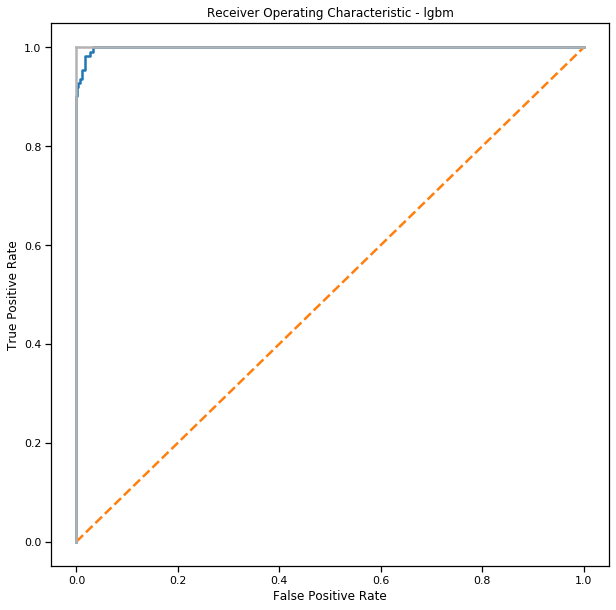

In [86]:
from sklearn.metrics import roc_curve, roc_auc_score
y_score1 = CV_lgbm.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
print('roc_auc_score for lgbm: ', roc_auc_score(y_test, y_score1))
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - lgbm')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


# STACKING EXAMPLE

In [93]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier
import numpy as np
import warnings

warnings.simplefilter('ignore')

clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], 
                          meta_classifier=lr)

print('3-fold cross validation:\n')

for clf, label in zip([clf1, clf2, clf3, sclf], 
                      ['KNN', 
                       'Random Forest', 
                       'Naive Bayes',
                       'StackingClassifier']):

    scores = model_selection.cross_val_score(clf, X_train, y_train, 
                                              cv=3, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

3-fold cross validation:

Accuracy: 0.90 (+/- 0.01) [KNN]
Accuracy: 0.98 (+/- 0.00) [Random Forest]
Accuracy: 0.89 (+/- 0.01) [Naive Bayes]
Accuracy: 0.92 (+/- 0.01) [StackingClassifier]


# STACKING EXAMPLE USING CV

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from mlxtend.classifier import StackingClassifier

# Initializing models

clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], 
                          meta_classifier=lr)

params = {'kneighborsclassifier__n_neighbors': [1, 5],
          'randomforestclassifier__n_estimators': [10, 50],
          'meta_classifier__C': [0.1, 10.0]}

grid = GridSearchCV(estimator=sclf, 
                    param_grid=params, 
                    cv=5,
                    refit=True)
grid.fit(X_train, y_train)

cv_keys = ('mean_test_score', 'std_test_score', 'params')

for r, _ in enumerate(grid.cv_results_['mean_test_score']):
    print("%0.3f +/- %0.2f %r"
          % (grid.cv_results_[cv_keys[0]][r],
             grid.cv_results_[cv_keys[1]][r] / 2.0,
             grid.cv_results_[cv_keys[2]][r]))

print('Best parameters: %s' % grid.best_params_)
print('Accuracy: %.2f' % grid.best_score_)

0.942 +/- 0.00 {'kneighborsclassifier__n_neighbors': 1, 'meta_classifier__C': 0.1, 'randomforestclassifier__n_estimators': 10}
0.942 +/- 0.00 {'kneighborsclassifier__n_neighbors': 1, 'meta_classifier__C': 0.1, 'randomforestclassifier__n_estimators': 50}
0.893 +/- 0.01 {'kneighborsclassifier__n_neighbors': 1, 'meta_classifier__C': 10.0, 'randomforestclassifier__n_estimators': 10}
0.934 +/- 0.01 {'kneighborsclassifier__n_neighbors': 1, 'meta_classifier__C': 10.0, 'randomforestclassifier__n_estimators': 50}
0.984 +/- 0.00 {'kneighborsclassifier__n_neighbors': 5, 'meta_classifier__C': 0.1, 'randomforestclassifier__n_estimators': 10}
0.986 +/- 0.00 {'kneighborsclassifier__n_neighbors': 5, 'meta_classifier__C': 0.1, 'randomforestclassifier__n_estimators': 50}
0.984 +/- 0.00 {'kneighborsclassifier__n_neighbors': 5, 'meta_classifier__C': 10.0, 'randomforestclassifier__n_estimators': 10}
0.986 +/- 0.00 {'kneighborsclassifier__n_neighbors': 5, 'meta_classifier__C': 10.0, 'randomforestclassifier_

In [115]:
grid.best_estimator_

StackingClassifier(average_probas=False,
                   classifiers=[KNeighborsClassifier(algorithm='auto',
                                                     leaf_size=30,
                                                     metric='minkowski',
                                                     metric_params=None,
                                                     n_jobs=None, n_neighbors=5,
                                                     p=2, weights='uniform'),
                                RandomForestClassifier(bootstrap=True,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       min_impurity_decreas

roc_auc_score for Stacking:  0.9576761061402699


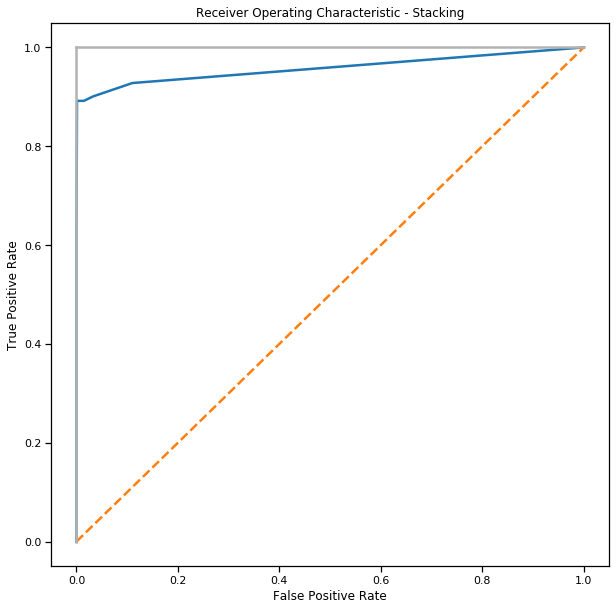

In [117]:
from sklearn.metrics import roc_curve, roc_auc_score
y_score1 = grid.best_estimator_.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
print('roc_auc_score for Stacking: ', roc_auc_score(y_test, y_score1))
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Stacking')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
